# Read Data Iris

In [1]:
data_path = "iris/iris_data.csv"
label_path = "iris/iris_label.csv"

In [2]:
def read_csv(file_path) -> list:

    """Reads a CSV file and returns a list of lists."""

    data = []

    with open(file_path, "r") as file:

        for line in file:

            stripped_line = line.strip().rstrip(';')

            data.append(stripped_line.split(";"))

    return data


In [3]:
data = read_csv(data_path)

labels = read_csv(label_path)


In [4]:
data[:5], labels[:5]

([['5.8', '2.8', '5.1', '2.4'],
  ['6.0', '2.2', '4.0', '1.0'],
  ['5.5', '4.2', '1.4', '0.2'],
  ['7.3', '2.9', '6.3', '1.8'],
  ['5.0', '3.4', '1.5', '0.2']],
 [['2'], ['1'], ['0'], ['2'], ['0']])

# Calculate Distance Matrix

In [5]:
import numpy as np

In [6]:
data_np = np.array(data, dtype=np.float32)

In [7]:
def compute_distance_matrix(data):
    num_samples = data.shape[0]
    distance_matrix = np.zeros((num_samples, num_samples))
    
    for i in range(num_samples):
        for j in range(i + 1, num_samples):
            distance = np.sqrt(np.sum((data[i] - data[j])**2))
            distance_matrix[i, j] = distance_matrix[j, i] = distance
            
    return distance_matrix

In [8]:
### calculate distance
distance_matrix = compute_distance_matrix(data_np)

In [9]:
distance_matrix[:5, :5]

array([[0.        , 1.88944435, 4.5365181 , 2.01494431, 4.33589649],
       [1.88944435, 0.        , 3.41320944, 2.84780645, 3.05450511],
       [4.5365181 , 3.41320944, 0.        , 5.61248589, 0.94868308],
       [2.01494431, 2.84780645, 5.61248589, 0.        , 5.58032274],
       [4.33589649, 3.05450511, 0.94868308, 5.58032274, 0.        ]])

# Implement the Linkage Method

## 1) Simple Linkage

In [10]:
def simple_linkage(cluster1, cluster2, distance_matrix):
    min_distance = np.inf
    for i in cluster1:
        for j in cluster2:
            if distance_matrix[i, j] < min_distance:
                min_distance = distance_matrix[i, j]
    return min_distance

## 2) Complete Linkage

In [11]:
def complete_linkage(cluster1, cluster2, distance_matrix):
    max_distance = 0
    for i in cluster1:
        for j in cluster2:
            if distance_matrix[i, j] > max_distance:
                max_distance = distance_matrix[i, j]
    return max_distance

## 3) Group Average Linkage

In [12]:
def average_linkage(cluster1, cluster2, distance_matrix):
    distances = [distance_matrix[i, j] for i in cluster1 for j in cluster2]
    return np.mean(distances)

In [13]:
# Test the functions with the first 2 clusters
cluster1 = [0] # Suppose the first cluster has only the first point
cluster2 = [1] # Suppose the second cluster has only the second point

In [14]:
simple_distance = simple_linkage(cluster1, cluster2, distance_matrix)
complete_distance = complete_linkage(cluster1, cluster2, distance_matrix)
average_distance = average_linkage(cluster1, cluster2, distance_matrix)

In [15]:
simple_distance, complete_distance, average_distance

(1.889444351196289, 1.889444351196289, 1.889444351196289)

# Perform Clustering

In [16]:
# Initialize initial clusters, each data point is a cluster
clusters = [[i] for i in range(len(data))]

In [17]:
def clustering(distance_matrix, linkage_method, num_clusters=3):
    current_clusters = clusters.copy()
    
    while len(current_clusters) > num_clusters:
        min_distance = np.inf
        clusters_to_merge = (None, None)

        for i in range(len(current_clusters)):
            for j in range(i + 1, len(current_clusters)):
                distance = linkage_method(current_clusters[i], current_clusters[j], distance_matrix)
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)

        new_cluster = current_clusters[clusters_to_merge[0]] + current_clusters[clusters_to_merge[1]]
        if clusters_to_merge[0] < clusters_to_merge[1]:
            del current_clusters[clusters_to_merge[1]]
            del current_clusters[clusters_to_merge[0]]
        else:
            del current_clusters[clusters_to_merge[0]]
            del current_clusters[clusters_to_merge[1]]
        current_clusters.append(new_cluster)
    
    return current_clusters

## 1) Perform clustering with Simple Linkage

In [18]:
final_clusters_simple = clustering(distance_matrix, simple_linkage, num_clusters=3)

In [19]:
[len(cluster) for cluster in final_clusters_simple]

[2, 50, 98]

## 2) Perform clustering with Complete Linkage

In [20]:
final_clusters_complete = clustering(distance_matrix, complete_linkage, num_clusters=3)

In [21]:
[len(cluster) for cluster in final_clusters_complete]

[28, 50, 72]

## 3) Perform clustering with Group Average Linkage

In [22]:
final_clusters_average = clustering(distance_matrix, average_linkage, num_clusters=3)

In [23]:
[len(cluster) for cluster in final_clusters_average]

[50, 36, 64]

# Dendrogram

In [24]:
import matplotlib.pyplot as plt

In [25]:
colors = ['red', 'green', 'blue']
label_names = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

## 1) Simple Linkage

In [26]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

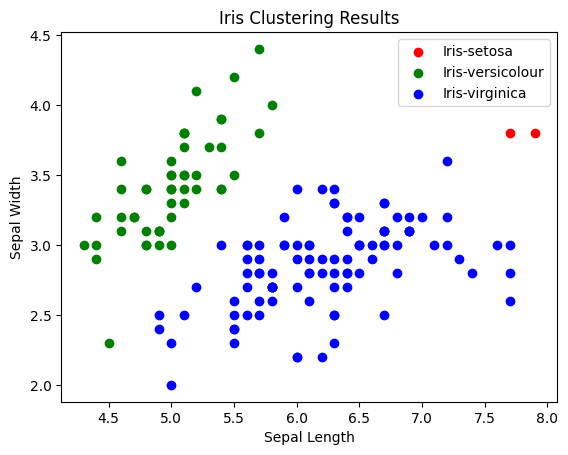

In [27]:
for cluster_index, cluster in enumerate(final_clusters_simple):
    cluster_points = data_np[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_index], label=label_names[cluster_index])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clustering Results')
plt.legend()
plt.show()

## 2) Complete Linkage

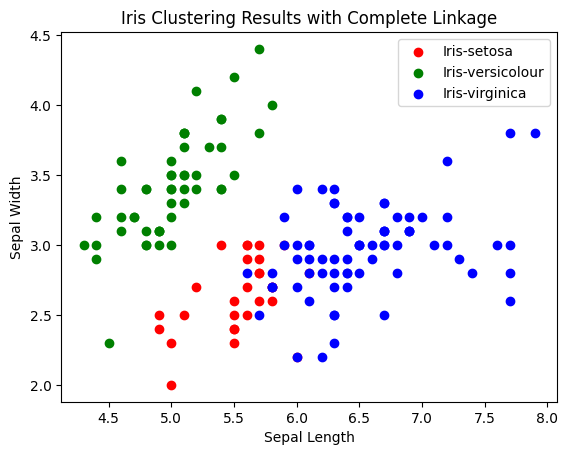

In [28]:
for cluster_index, cluster in enumerate(final_clusters_complete):
    cluster_points = data_np[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_index], label=label_names[cluster_index])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clustering Results with Complete Linkage')
plt.legend()
plt.show()

## 3) Group Average Linkage

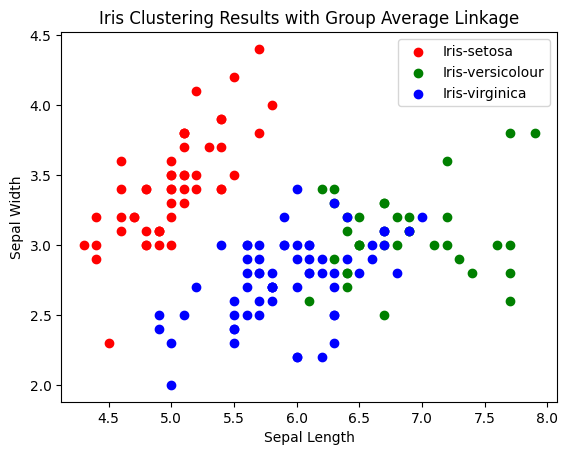

In [29]:
for cluster_index, cluster in enumerate(final_clusters_average):
    cluster_points = data_np[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_index], label=label_names[cluster_index])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clustering Results with Group Average Linkage')
plt.legend()
plt.show()